# Decision Trees

Based on [mlcourse.ai](https://mlcourse.ai/)

## Terminology

### Entropy
Shannon's entropy is defined for a system with N possible states as follows:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

where $p_i$ is the probability of finding the system in the $i$-th state. This is a very important concept used in physics, information theory, and other areas. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa.

#### Example
To illustrate how entropy can help us identify good features for building a decision tree, let's look at a toy example. We will predict the color of the ball based on its position.

<img align='center' src='https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'><br>

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img align='center' src='https://habrastorage.org/webt/5k/ur/88/5kur88sfin6hoffp6ljbyktcur4.png'><br>

### Information Gain
The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 $$

In [2]:
1 - (13/20)*.96 - (7/20)*.6

0.166

$$ \Large IG(x \leq 12) \approx 0.16. $$

It turns out that dividing the balls into two groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue to divide them into groups until the balls in each group are all of the same color.
<img align='center' src='https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png'><br>

Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

### Gini Impurity

- Gini uncertainty (or Gini impurity) is another heuristic that allows us to formalize partitions in a tree.

$$ \Large G = 1 - \sum\limits_k (p_k)^2$$

Maximizing this criterion can be interpreted as the maximization of the number of pairs of objects of the same class that are in the same subtree (not to be confused with the Gini index).

In practice, Gini uncertainty and information gain work similarly.
 
For binary classification, entropy and Gini uncertainty take the following form:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

where ($p_+$ is the probability of an object having a label +).

If we plot these two functions against the argument $p_+$, we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

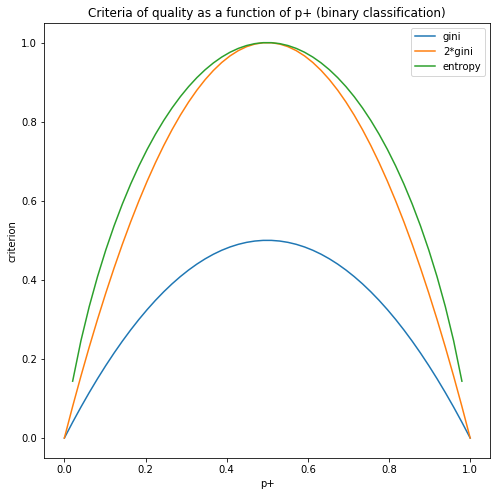

In [9]:
plt.figure(figsize=(8, 8))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();